# 1. K-Armed Bandit Problem
Bandit problems are reinforcement learning (RL) problems in which there is only a single state in which multiple actions can potentially be taken. In the k-armed bandit problem, you are repeatedly faced with a choice among k different options/actions. After selecting an action, you receive a reward chosen from a stationary probability distribution that is dependent on the selected action.
#### Objective: Maximize the expected total reward over some time period

Although the rewards for actions are chosen from a probability distribution, each action has a mean reward value. We start out with estimates of the rewards for each action, but with more selections/experience, the estimates converge to the mean. If we have a 'way' to quantify the value of taking each action (the expected reward), then to achieve the objective, we would simply always take the action with the highest value. Mathematically speaking,

$Q_t(a) = E[R_t | A_t = a]$

This says that the value of an arbitrary action **a** is the expected reward given that **a** is selected

* If we keep estimates of the action values, then at each step, there is at least one action whose estimate is the greatest. These actions are called **greedy actions** and if selected, we are said to be **exploting** our current knowledge of the values of actions
* If instaed we select a non-greedy action, then we are said to be **exploring** because it enables us to improve our estimates of the non-greedy action values

##  Sample-Average Action-Value Estimation
A simple method of estimating the value of an action is by averaging the rewards previosly received from taking that
action. i.e.

$$Q_t(a) = \frac{\text{sum of rewards when a is taken prior to t}}{\text{number of times a has been taken prior to t}}$$

The next step is then to use the estimates to select actions. The simplest rule is to select the action (or one of the actions) with the highest estimated values. This is called the **greedy action selection** method and is denoted:

$A_t = argmax_a Q_t(a)$

where $argmax_a$ denotes the value of a at which the expression is maximized
* If multiple actions maximize the expression, then it is important that the tie is broken **arbitrarily**

You may have guessed that being greedy all the time is probably not the best way to go - there may be an unexplored action of higher value than our current greedy choice. An alternative is to be greedy most of the time, but every once in a while, with probability $\epsilon$, select a random action. Methods with this action selection rule are called **$\epsilon$-greedy methods**. This means that with probability $\epsilon$ we select a random action and with probability $1-\epsilon$ we select a greedy action.

## Problem Description
We have a k-armed bandit problem with k = 10. The actual action values, $q_*(a)$ are selected according to a normal distribution with mean 0 and variance 1. When a learning method selects action $A_t$ at time t, the actual reward $R_t$ is selected from a normal distribution with mean $q_*(A_t)$ and variance 1. We'll measure the behavior as it improves over 1000 steps. This makes up one run. We'll execute 2000 independent runs to obtain the learning algorithm's average behavior.

### Environment
* Python 3.5
* numpy
* matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def sample_average(actions):
    """
    Returns the action-value for each action using the sample-average method
    :param actions: actions[0] is a tuple for each action of the form (sum of rewards received, no. of times taken)
    """
    results = [0.0 if actions[i][1] == 0 else actions[i][0] / float(actions[i][1]) for i in range(len(actions))]
    return results

In [3]:
def get_reward(true_values, a):
    """
    Returns the reward for selecting action a.
    Reward is selected around true_values[a] with unit variance (as in problem description)
    :param true_values: list of expected reward for each action
    :param a: index of action to return reward for
    """
    reward = np.random.normal(true_values[a], size=1)[0]
    return reward

In [4]:
def k_armed_bandit(k, epsilon, iterations):
    """
    Performs a single run of the k-armed bandit experiment
    :param k: the number of arms
    :param epsilon: value of epsilon for epoch-greedy action selection
    :param iterations: number of steps in a single run
    """
    # Randomly assign true values of reward for each action with mean 0 and variance 1
    true_values = np.random.normal(size=k)
    
    # actions[i] is the ith action
    # actions[i][0] is the sum of received rewards for taking action i
    # actions[i][1] is the number of times action i has been taken
    actions = [[0.0, 0] for _ in range(k)]
    
    # Store the rewards received for this experiment
    rewards = []
    
    # Track how often the optimal action was selected
    optimal = []
    optimal_action = true_values.argmax()
    
    for _ in range(iterations):
        prob = np.random.rand(1)
        
        if prob > epsilon:
            # Greedy (exploit current knowledge)
            action_values = np.array(sample_average(actions))
            
            # Break ties arbitrarily (reference: http://stackoverflow.com/questions/42071597/numpy-argmax-random-tie-breaking)
            a = np.random.choice(np.flatnonzero(action_values == action_values.max()))
        else:
            # Explore (take random action)
            a = np.random.randint(0, k)
            
        reward = get_reward(true_values, a)        
        
        # Update statistics for executed action
        actions[a][0] += reward
        actions[a][1] += 1
        
        rewards.append(reward)
        optimal.append(1 if a == optimal_action else 0)
    
    return rewards, optimal

In [5]:
def experiment(k, epsilon, iters, epochs):
    """
    Runs the k-armed bandit experiment
    :param k: the number of arms
    :param epsilon: the value of epsilon for epoch-greedy action selection
    :param iters: the number of steps in a single run
    :param epochs: the number of runs to execute
    """
    rewards = []
    optimal = []
    
    for i in range(epochs):
        r, o = k_armed_bandit(k, epsilon, iters)
        rewards.append(r)
        optimal.append(o)
        
    print('Experiment with \u03b5 = {} completed.'.format(epsilon))
    
    # Compute the mean reward for each iteration
    r_means = np.mean(rewards, axis=0)
    o_means = np.mean(optimal, axis=0)
    
    return r_means, o_means

In [6]:
k = 10
iters = 1000
runs = 2000

# We experiment with values 0.01, 0.1 and 0 (always greedy)
r_exp1, o_exp1 = experiment(k, 0, iters, runs)
r_exp2, o_exp2 = experiment(k, 0.01, iters, runs)
r_exp3, o_exp3 = experiment(k, 0.1, iters, runs)

Experiment with ε = 0 completed.
Experiment with ε = 0.01 completed.
Experiment with ε = 0.1 completed.


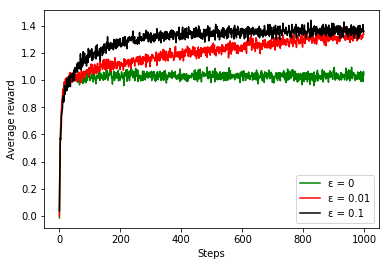

In [7]:
x = range(iters)
plt.plot(x, r_exp1, c='green', label='\u03b5 = 0')
plt.plot(x, r_exp2, c='red', label='\u03b5 = 0.01')
plt.plot(x, r_exp3, c='black', label='\u03b5 = 0.1')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

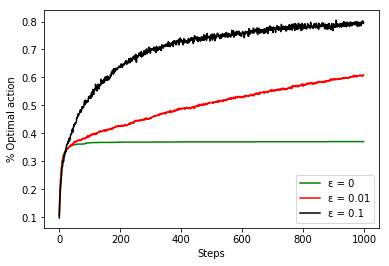

In [8]:
plt.plot(x, o_exp1, c='green', label='\u03b5 = 0')
plt.plot(x, o_exp2, c='red', label='\u03b5 = 0.01')
plt.plot(x, o_exp3, c='black', label='\u03b5 = 0.1')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()
plt.show()

From these results we can see that the greedy method ($\epsilon$ = 0) performs the worst. This is because it simply selects the same action each time (the first one that gives a positive reward, remember, all are initialized to 0.0 so have equal liklihood initially). The other experiments involve exploration of varying degrees and so can be seen improving wiith time.

### Incremental Implementation
In the code listing above, we computed the values of actions by summing rewards and then dividing by the number of times a particular action was taken. i.e.
$Q_n = \frac{R_1 + R_2 + ... + R_{n-1}}{n - 1}$

An obvious implemtattion would be to maintain a record of all the rewards and then perform this computation when needed. This can be memory intensive and is unnecessary. We can show that that computation can be computed incrementally as:
$Q_{n+1} = Q_n + \frac{1}{n}[R_n - Q_n]$

#### Proof
\begin{align}
Q_{n+1} & = \frac{1}{n}\sum_{i = 1}^n R_i \\
& = \frac{1}{n}\left(R_n + \sum_{i=1}^{n-1} R_i\right) \\
& = \frac{1}{n}\left(R_n + (n-1)\frac{1}{n-1} \sum_{i = 1}^{n-1} R_i\right) \\
& = \frac{1}{n}\left(R_n + (n-1)Q_n\right) \\
& = \frac{1}{n}\left(R_n + nQ_n - Q_n\right) \\
& = Q_n + \frac{1}{n} \left(R_n - Q_n\right)
\end{align}

In [ ]:
# We get rid of the sample_average() method and modify k_armed_bandit as follows:
# Lines marked ** indicate changes to the code
def k_armed_bandit(k, epsilon, iterations):
    """
    Performs a single run of the k-armed bandit experiment
    :param k: the number of arms
    :param epsilon: Value of epsilon for epoch-greedy action selection
    """
    # Randomly assign true values of reward for each action with mean 0 and variance 1
    true_values = np.random.normal(size=k)
    
    # Estimates of action values **
    Q = np.zeros(k)
    
    # N[i] is the no. of times action i has been taken **
    N = np.zeros(k)
    
    # Store the rewards received for this experiment
    rewards = []
    
    # Track how often the optimal action was selected
    optimal = []
    optimal_action = true_values.argmax()
    
    for _ in range(iterations):
        prob = np.random.rand(1)
        
        if prob > epsilon:
            # Greedy (exploit current knowledge) **
            a = np.random.choice(np.flatnonzero(Q == Q.max()))
        else:
            # Explore (take random action)
            a = np.random.randint(0, k)
            
        reward = get_reward(true_values, a)        
        
        # Update statistics for executed action **
        N[a] += reward
        Q[a] += (1.0 / N[a]) * (reward - Q[a])
        
        rewards.append(reward)
        optimal.append(1 if a == optimal_action else 0)
    
    return rewards, optimal

## References
1. Richard S. Sutton, Andrew G. Barto (1998). Reinforcement Learning: An Introduction. MIT Press.